<a href="https://colab.research.google.com/github/shunrei9841-sudo/Guadalupe/blob/main/Ejercicio%2017-11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

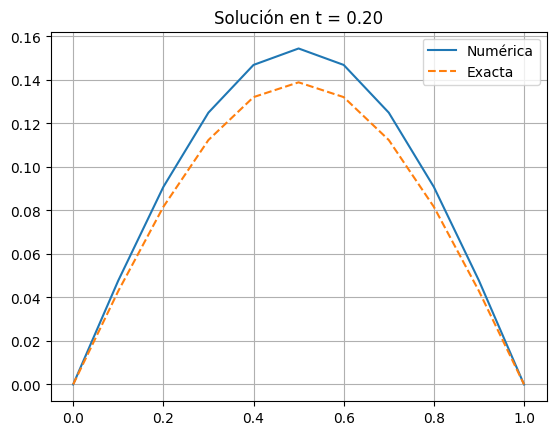

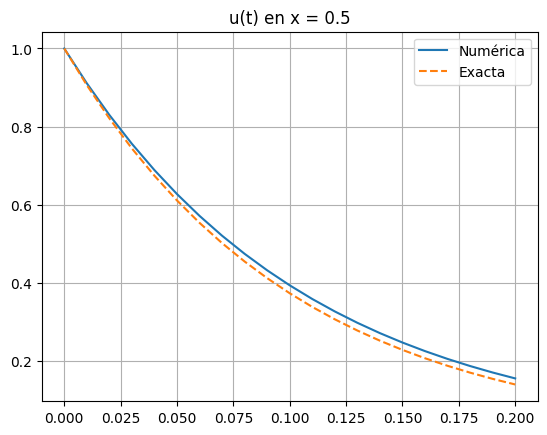

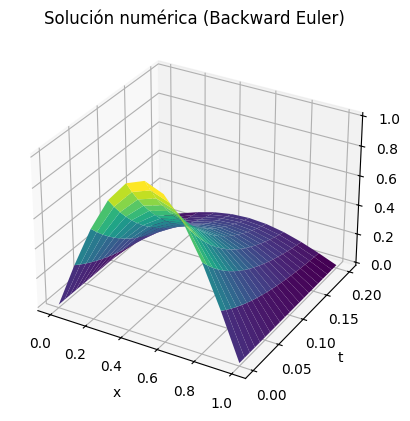

Error máximo en t=0.20 = 0.015560025682766015


In [7]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D   # necesario para 3D
from matplotlib import cm                # colormap


# Parámetros
h = 0.1            # Δx
k = 0.01           # Δt
r = k/h**2

x_nodes = int(1/h)
t_steps = int(0.20/k)

x = np.linspace(0,1,x_nodes+1)
t = np.linspace(0,0.20,t_steps+1)

# Condición inicial
u = np.sin(np.pi * x)

# Construcción de la matriz A: tridiagonal
N = x_nodes - 1
A = np.zeros((N,N))

for i in range(N):
    A[i,i] = 1 + 2*r
    if i > 0:
        A[i,i-1] = -r
    if i < N-1:
        A[i,i+1] = -r

# Almacenamiento de la solución U(j,i)
U = np.zeros((t_steps+1, x_nodes+1))
U[0,:] = u.copy()

# Avance temporal
for j in range(t_steps):

    b = u[1:-1].copy()               # RHS de nodos interiores
    u_new = np.linalg.solve(A, b)

    # Impone condiciones de frontera
    u[1:-1] = u_new
    u[0] = 0
    u[-1] = 0

    U[j+1,:] = u.copy()


# Solución exacta
U_exact = np.zeros_like(U)
for j in range(t_steps+1):
    U_exact[j,:] = np.exp(-np.pi**2 * t[j]) * np.sin(np.pi * x)


# -----------------------------
#   GRAFICAS
# -----------------------------

# 1) Comparación en t = 0.20
plt.figure()
plt.plot(x, U[-1], label="Numérica")
plt.plot(x, U_exact[-1], '--', label="Exacta")
plt.title("Solución en t = 0.20")
plt.grid(True)
plt.legend()
plt.show()

# 2) Evolución temporal en x=0.5
mid = int(0.5/h)
plt.figure()
plt.plot(t, U[:,mid], label="Numérica")
plt.plot(t, U_exact[:,mid], '--', label="Exacta")
plt.title("u(t) en x = 0.5")
plt.grid(True)
plt.legend()
plt.show()

# 3) Superficie 3D (solución numérica)
X, T = np.meshgrid(x, t)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, U, cmap=cm.viridis)
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u")
ax.set_title("Solución numérica (Backward Euler)")
plt.show()


# -----------------------------
#  ERRORES
# -----------------------------
error_max = np.max(np.abs(U[-1] - U_exact[-1]))
print("Error máximo en t=0.20 =", error_max)